<a href="https://colab.research.google.com/github/fbett5/Project-2_Group-3/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install rise

# import warnings

##### AUTOMOBILE DATASET ANALYSIS

We planning to divide it into four parts:

1. Data Wrangling -pre-processing data in python -dealing missing values -data formatting -data normalization -binning

2. Exploratory Data Analysis -descriptive statistics -groupby -analysis of variance -correlation -correlation stats

3. Model Development:

A. Simple Linear Regression

B. Multiple Linear Regression

4. Model Evaluation:

A. Regression Plots

B. Distribution Plots



# importing libraries

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('Automobile_data.csv')

In [ ]:
display(df)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [ ]:
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


##### 
Each column has 205 rows of data and 7 columns containing missing data:

"normalized-losses": 41 missing data
"num-of-doors": 2 missing data
"bore": 4 missing data
"stroke" : 4 missing data
"horsepower": 2 missing data
"peak-rpm": 2 missing data
"price": 4 missing data

In [ ]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

##### Replace "NaN" by mean value in that particular column

In [ ]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

df["normalized-losses"].replace(np.nan,avg_norm_loss,inplace=True)

Average of normalized-losses: 122.0


In [ ]:
avg_bore = df["bore"].astype("float").mean(axis=0)
print("Average of Bore Values:",avg_bore)

df["bore"].replace(np.nan,avg_bore,inplace=True)

Average of Bore Values: 3.3297512437810957


In [ ]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Average peak rpm: 5125.369458128079


In [ ]:
avg_stroke = df["stroke"].astype("float").mean(axis=0)
print("Average of Stroke Values:",avg_bore)

df["stroke"].replace(np.nan,avg_stroke,inplace = True)

Average of Stroke Values: 3.3297512437810957


In [ ]:
avg_horsepower = df['horsepower'].astype("float").mean(axis=0)
print("Average horsepower:", avg_horsepower)

df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

Average horsepower: 104.25615763546799


In [ ]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [ ]:
#replace the missing 'num-of-doors' values by the most frequent 
df['num-of-doors'].replace(np.nan,"four",inplace=True)

##### Finally, we dropped all rows that do not have price data:

In [ ]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"],axis=0,inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True,inplace=True)

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


***Some columns have the wrong data type. Numerical variables should be float or int, and string variables like categories should be object. For example, the variables 'bore' and'stroke' should be of type 'float' or 'int', but they are of type 'object'. Using the "astype()" technique, we must format each column's data type***

In [ ]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

##### Convert data types to proper format

In [ ]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
df[["horsepower"]] = df[["horsepower"]].astype("float")

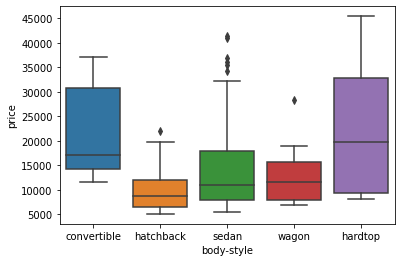

In [ ]:
sns.boxplot(x="body-style", y="price", data=df)

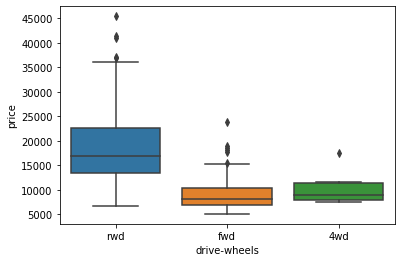

In [ ]:
sns.boxplot(x="drive-wheels", y="price", data=df)

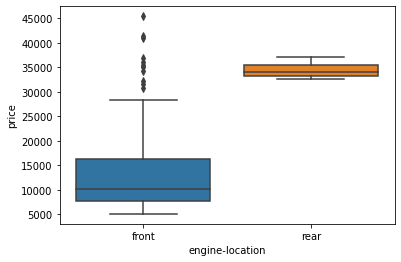

In [ ]:
sns.boxplot(x="engine-location", y="price", data=df)

In [ ]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


##### Regression plots, to check the how the other parameters afffect the price of the vehicle

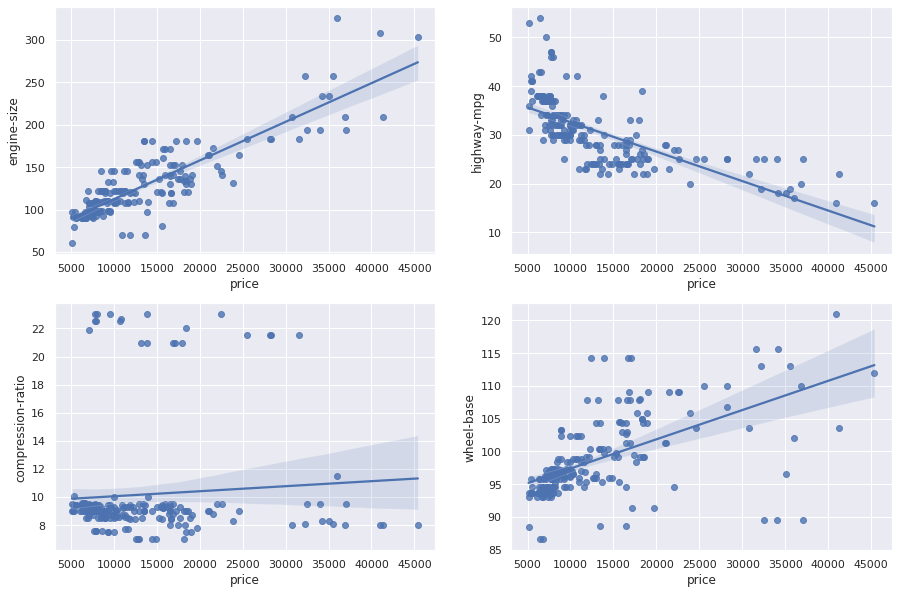

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize = (15,10))

#create boxplot in each subplot
sns.regplot(data=df, x='price', y='engine-size', ax=axes[0,0], )
sns.regplot(data=df, x='price', y='highway-mpg', ax=axes[0,1])
sns.regplot(data=df, x='price', y='compression-ratio', ax=axes[1,0])
sns.regplot(data=df, x='price', y='wheel-base', ax=axes[1,1])

In [ ]:
print(df['fuel-type'].unique())
print(df['aspiration'].unique())
print(df['drive-wheels'].unique())
print(df['engine-location'].unique())
print(df['engine-type'].unique())
print(df['num-of-cylinders'].unique())
print(df['make'].unique())

['gas' 'diesel']
['std' 'turbo']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


##### Mapping variables from string to intergers so that we use in our price prediction.


In [ ]:
#listing the variables to map
varlist = ['fuel-type', 'aspiration','drive-wheels','engine-location', 'engine-type', 'num-of-cylinders','make']
#defining maping fuction
def binary_map(x):
  return x.map({'gas':1, 'diesel':2, 'std':1, 'turbo':2, 'rwd':1, 'fwd':2, '4wd':3,
                'front':1, 'rear':2, 'dohc':1, 'ohcv':2, 'l':3,'rotor':4, 'ohcf':5,'dohcv':6,
                'four':4,'six':6, 'five':5,'three':3, 'twelve':12, 'two':2, 'eight':8, 
                'alfa-romero':1, 'audi':2, 'bmw':3,'chevrolet':4,'dodge':5,'honda':6, 'isuzu':7, 'jaguar':8,
                'mazda':9, 'mercedes-benz':10, 'mercury':11, 'mitsubishi':12, 'nissan':13, 'peugot':14,
                 'plymouth':15, 'porsche':16, 'renault':17, 'saab':18, 'subaru':19, 'toyota':20, 'volkswagen':21,
                 'volvo':22 })
# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,1,1,1,two,convertible,1,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,1,1,1,two,convertible,1,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,1,1,1,two,hatchback,1,1,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,2,1,1,four,sedan,2,1,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,2,1,1,four,sedan,3,1,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [ ]:
df.corr()

,symboling,normalized-losses,make,fuel-type,aspiration,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,4.662638e-01,-0.129645,-0.196735,-0.054615,0.053056,2.123389e-01,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,0.008612,-0.118016,-0.110581,-0.140019,-0.008153,-0.182196,0.279740,-0.035527,0.036233,-0.082391
normalized-losses,0.466264,1.000000e+00,-0.254356,-0.101546,-0.006911,-0.317214,1.512888e-17,-0.056661,0.019424,0.086802,-0.373737,0.099404,-0.458925,0.111362,0.112360,-0.029862,0.055045,-0.114713,0.239543,-0.225016,-0.181877,0.133999
make,-0.129645,-2.543563e-01,1.000000,0.109330,0.071254,0.034844,5.331188e-02,0.073930,0.110468,-0.005115,0.230754,0.017115,0.307688,-0.137205,-0.084770,0.236814,-0.203691,0.132554,-0.212912,0.065761,0.059111,-0.163646
fuel-type,-0.196735,-1.015463e-01,0.109330,1.000000,0.408228,-0.131096,-4.091700e-02,0.307237,0.211187,0.244356,0.281578,0.221046,0.011234,-0.019874,0.070779,0.054458,0.241064,0.985231,-0.475812,0.265676,0.198690,0.110326
aspiration,-0.054615,-6.910980e-03,0.071254,0.408228,1.000000,-0.094469,-5.749596e-02,0.256889,0.230085,0.305732,0.090336,0.321955,-0.012364,-0.050026,0.110040,0.227816,0.218233,0.307522,-0.190057,-0.189237,-0.241851,0.179578
drive-wheels,0.053056,-3.172142e-01,0.034844,-0.131096,-0.094469,1.000000,-1.493687e-01,-0.467661,-0.495197,-0.481395,0.025096,-0.590642,0.520643,-0.314196,-0.526027,-0.471838,-0.078738,-0.120125,0.035765,0.469240,0.472893,-0.588333
engine-location,0.212339,1.512888e-17,0.053312,-0.040917,-0.057496,-0.149369,1.000000e+00,-0.189115,-0.053086,-0.052205,-0.109225,0.051287,0.327228,0.190647,0.199367,0.188413,-0.139339,-0.020467,0.201917,-0.157132,-0.102964,0.331062
wheel-base,-0.535987,-5.666124e-02,0.073930,0.307237,0.256889,-0.467661,-1.891150e-01,1.000000,0.876024,0.814507,0.590742,0.782097,-0.313084,0.348931,0.572027,0.493244,0.158018,0.250313,-0.360305,-0.470606,-0.543304,0.584642
length,-0.365404,1.942356e-02,0.110468,0.211187,0.230085,-0.495197,-5.308613e-02,0.876024,1.000000,0.857170,0.492063,0.880665,-0.462633,0.440348,0.685025,0.608971,0.123952,0.159733,-0.285970,-0.665192,-0.698142,0.690628
width,-0.242423,8.680206e-02,-0.005115,0.244356,0.305732,-0.481395,-5.220549e-02,0.814507,0.857170,1.000000,0.306002,0.866201,-0.395023,0.520118,0.729436,0.544885,0.188822,0.189867,-0.245800,-0.633531,-0.680635,0.751265


In [ ]:
df.duplicated().value_counts()

False    201
dtype: int64

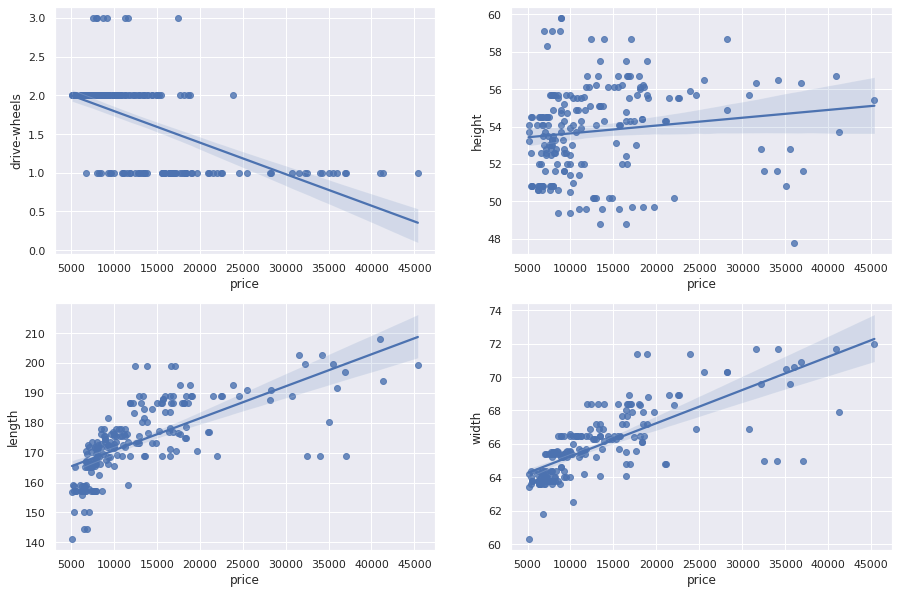

In [ ]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize = (15,10))

#create boxplot in each subplot
sns.regplot(data=df, x='price', y='drive-wheels', ax=axes[0,0], )
sns.regplot(data=df, x='price', y='height', ax=axes[0,1])
sns.regplot(data=df, x='price', y='length', ax=axes[1,0])
sns.regplot(data=df, x='price', y='width', ax=axes[1,1])

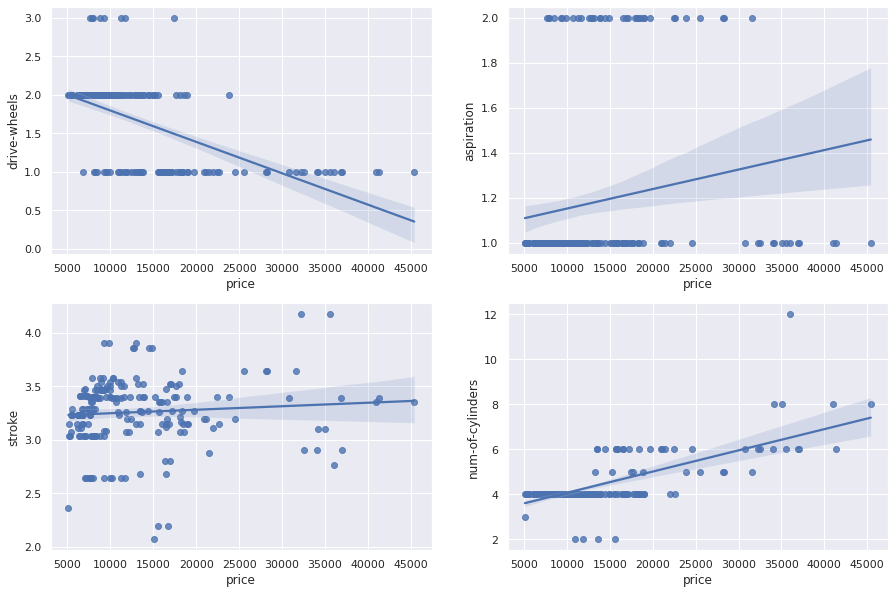

In [ ]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize = (15,10))

#create boxplot in each subplot
sns.regplot(data=df, x='price', y='drive-wheels', ax=axes[0,0], )
sns.regplot(data=df, x='price', y='aspiration', ax=axes[0,1])
sns.regplot(data=df, x='price', y='stroke', ax=axes[1,0])
sns.regplot(data=df, x='price', y='num-of-cylinders', ax=axes[1,1])

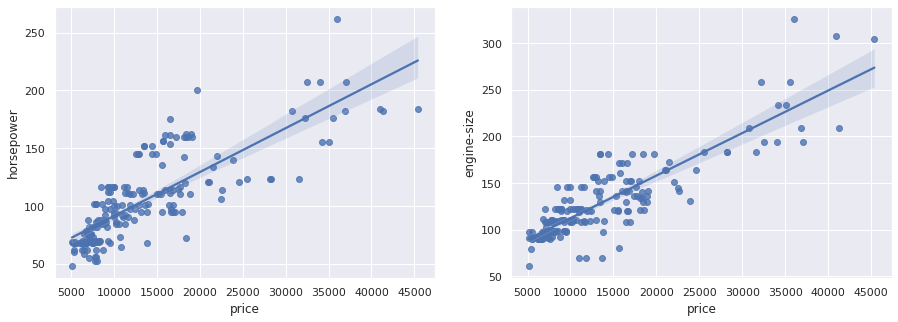

In [ ]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(1, 2, figsize = (15,5))

#create boxplot in each subplot
sns.regplot(data=df, x='price', y='horsepower', ax=axes[0], )
sns.regplot(data=df, x='price', y='engine-size', ax=axes[1])


In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

###### From the distribution data, we can see that there are no outliers in the data. 
There is a gradual increase in the numbers.

##### Model Building
Before building the model, we’ll split the data into train and test data, similar to the linear regression model. So that we’ll make the model using train data and evaluate the model on test data.


###### Test-Train Split
By using the sklearn library, we’ll import the test_train_split to split the data. But before splitting the data, we’ll divide the dataset into two dataframes X and y.

In [ ]:
# Importing necessary libraries to split the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 


###### Let’s assign the target variable to y and split the data into test and train sets.

In [ ]:
X = df[["horsepower"]]
# Putting response variable to y
y = df['price']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=45)

In [ ]:
# Create the Linear Regression model object
model = LinearRegression()

In [ ]:
# Train the model using the training sets
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [179.66626261]
y-axis intercept:  -5285.713768456686


In [ ]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

# Score the model with the testing dataset
model.score(X_test, y_test)

0.48983027641076343

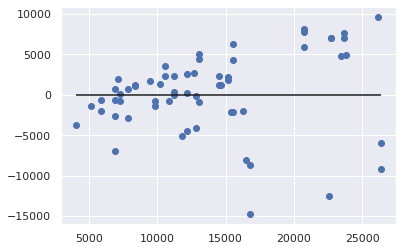

In [ ]:
# Plot outputs
plt.scatter(y_pred, y_pred-y_test)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max())

In [ ]:
# Create DataFrame of results
df_pred = pd.DataFrame({"Predicted": y_pred, "Actual": y_test, "Error": y_pred - y_test})[["Predicted", "Actual", "Error"]]
df_pred.head(10)

,Predicted,Actual,Error
45,26335.548451,35550.0,-9214.451549
72,26155.882189,16503.0,9652.882189
40,12860.578755,12945.0,-84.421245
58,9806.252291,10595.0,-788.747709
25,6931.592089,7609.0,-677.407911
13,16453.904008,24565.0,-8111.095992
166,15555.572695,11199.0,4356.572695
80,20765.894310,14869.0,5896.894310
3,13040.245018,13950.0,-909.754982
44,26335.548451,32250.0,-5914.451549


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


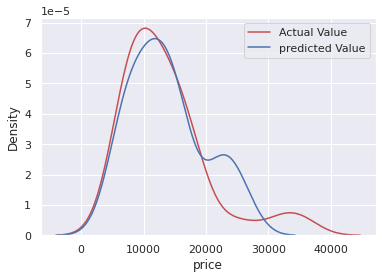

In [ ]:
ax1 = sns.distplot(y_test,hist = False, color="r", label="Actual Value")
sns.distplot(y_pred, hist = False, color="b", label="predicted Value", ax=ax1)
plt.ylim(0,)
plt.legend()
plt.show()

### Multiple Linear Regression

In [ ]:
# Importing necessary libraries to split the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [ ]:

X = df[["curb-weight",'engine-size','wheel-base','length','width', 'height','horsepower','highway-mpg']]
# Putting response variable to y
y = df['price']


In [ ]:
# Create our Validation training and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# Create the Linear Regression model object
model = LinearRegression()

In [ ]:
# Train the model using the training sets
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [  0.94510689  77.27050604 157.48682149 -48.5775502  622.41799541
   6.48888903  41.77552924 -43.50272569]
y-axis intercept:  -50784.258381569394


In [ ]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

# Score the model with the testing dataset
model.score(X_test, y_test)

0.7558481022290993

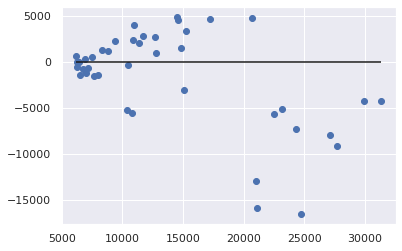

In [ ]:
# Plot outputs
plt.scatter(y_pred, y_pred-y_test)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max())

In [ ]:
# Create DataFrame of results
df_pred1 = pd.DataFrame({"Predicted": y_pred, "Actual": y_test, "Error": y_pred - y_test})[["Predicted", "Actual", "Error"]]
df_pred1.head(10)

,Predicted,Actual,Error
95,7025.794462,8249.0,-1223.205538
15,24702.017037,41315.0,-16612.982963
30,6281.804697,6855.0,-573.195303
158,7675.348783,9258.0,-1582.651217
128,12751.995361,11850.0,901.995361
115,6195.096601,5572.0,623.096601
69,27136.715771,35056.0,-7919.284229
171,12712.473365,9988.0,2724.473365
175,20727.769299,15998.0,4729.769299
45,31283.115764,35550.0,-4266.884236


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


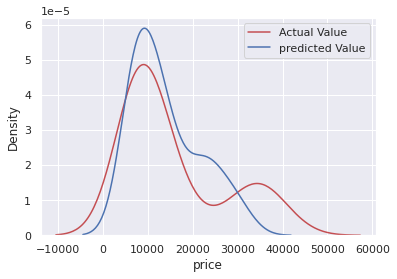

In [ ]:
ax1 = sns.distplot(y_test,hist = False, color="r", label="Actual Value")
sns.distplot(y_pred, hist = False, color="b", label="predicted Value", ax=ax1)
plt.ylim(0,)
plt.legend()
plt.show()